/tmp/ipykernel_228751/485500942.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Slope'] = (filtered_data['Fractional Flow'] - base_point[1]) / (filtered_data['Saturation'] - base_point[0])
/tmp/ipykernel_228751/485500942.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Derivative'] = filtered_data['Fractional Flow'].diff() / filtered_data['Saturation'].diff()


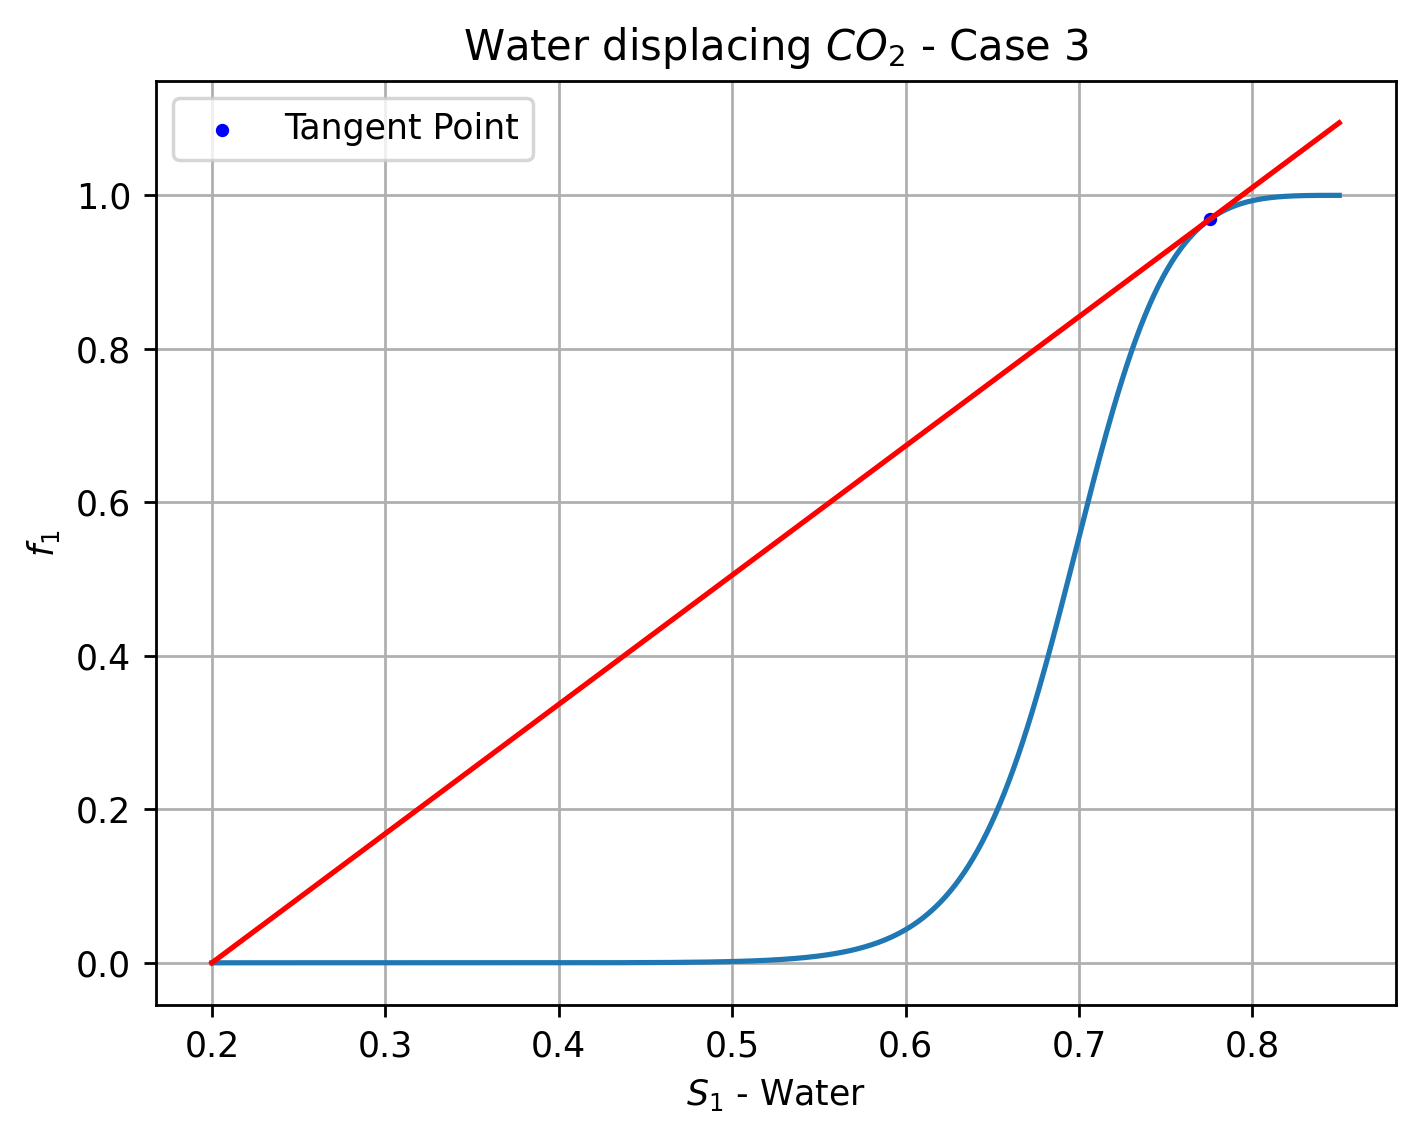

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#set figure with dpi = 250
plt.figure(dpi=250)
# Load the CSV data into a DataFrame
data_path = '/home/ejt123/2024/CodingFluidFlow/case_3_fractional_flow.csv'
data = pd.read_csv(data_path)

# Define the point from which we are drawing lines to each point on the curve
base_point = (0.2, 0.0)

# Extract the relevant range from the data
filtered_data = data[(data['Saturation'] >= 0.75) & (data['Saturation'] <= 0.85)]

# Calculate the slope from the base point to each point in the filtered data
filtered_data['Slope'] = (filtered_data['Fractional Flow'] - base_point[1]) / (filtered_data['Saturation'] - base_point[0])

# Find the slope of the tangent to the curve which should be equal to the derivative at that point
# Since we don't have an analytical expression of the curve, we will use a finite difference method to approximate it
filtered_data['Derivative'] = filtered_data['Fractional Flow'].diff() / filtered_data['Saturation'].diff()

# Now we need to find the point where the derivative is closest to the slope from the base point
# This is the point where the line would be tangent to the curve
# We will drop the NaN values that result from the diff() operation
filtered_data = filtered_data.dropna()

# Find the point with the minimum difference between the slope and the derivative
filtered_data['Difference'] = abs(filtered_data['Slope'] - filtered_data['Derivative'])
tangent_point = filtered_data.loc[filtered_data['Difference'].idxmin()]

# Save the slope of the tangent line
tangent_slope = tangent_point['Slope']
tangent_point_S1 = tangent_point['Saturation']

# Plot the original curve
plt.plot(data['Saturation'], data['Fractional Flow'])

# Calculate the y-intercept of the tangent line using the point-slope form of a line
# y - y1 = m(x - x1)
# y = mx - mx1 + y1
y_intercept = tangent_slope * base_point[0]

# Calculate the points on the tangent line using the slope and y-intercept
# Choose points around the tangent point for better visualization
x_tangent = np.linspace(0.2, 0.85, 100)
y_tangent = tangent_slope * (x_tangent - base_point[0])
#


# Plot the tangent line

plt.plot(x_tangent, y_tangent, color='red')

#Increase dpi = 250


# Mark the tangent point on the curve
plt.scatter(tangent_point_S1, tangent_slope * (tangent_point_S1 - base_point[0]), color='blue', label='Tangent Point', s=8)

# Label the axes and add a legend
plt.xlabel('$S_1$ - Water')
plt.ylabel('$f_1$')
plt.title('Water displacing $CO_2$ - Case 3')
plt.legend()
plt.grid()

# Show the plot with the tangent line
plt.show()

In [5]:
tangent_slope, tangent_point_S1

(1.683875880337911, 0.7757515030060118)